
# Project: No-shows on Medical Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### No-shows on Medical Appointment

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

>Here are key points, terms defined
1. PatientId - Identification of a patient.
2. AppointmentID - Identification of each appointment.
3. Gender - Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
4. ScheduledDay - day the patient set up their appointment.
5. AppointmentDay - The day of the actuall appointment, when they have to visit the doctor.
6. Age - How old is the patient.
7. Neighbourhood - Where the appointment takes place.
8. Scholarship - True of False . 
9. Hipertension - 1 (True) or 0 (False).
10. Diabetes - 1 (True) or 0 (False).
11. Alcoholism - 1 (True) or 0 (False).
12. Handcap - 1 (True) or 0 (False).
13. SMS_received - 1 or more messages sent to the patient.
14. No-show - No (if the patient showed up to their appointment) and Yes (if they did not show up).



> **The following questions will be asked and answered**
1. What percentage did not show up for the appointment as against those who showed up
2. What age range had the lowest number of no show
3. What day of the week had the highest number of No shows on the day of appointment
4. What Gender has the highest scholarship and still did not show for the appointment


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

<a id='wrangling'></a>
## Data Wrangling

> Here, I will load in the data, check for null values or duplicated values as well as the data type of respecive feature (column). 
>
>I will also carry out a brief statistical analysis of the data

In [2]:
#loading my dataset

dt = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
dt.head(3)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


The above output on my dataset printed just three rows and the entire columns.
>
>This was made possible with the **.head()** function and the three enclosed in parenthesis
>
>I am going to check for the **shape** (total rows and columns of my entire dataset) after which I will check the summaries of all columns with the **describe()** function. This will help me understand some basic statistical values of my dataset.

In [3]:
#this line of code helps you output the total number of samples (row) and also, the total number of column
print("There are {0} rows and {1} columns in the dataset".format(dt.shape[0], dt.shape[1]))

There are 110527 rows and 14 columns in the dataset


It is evident that we have a total of 110,527 rows and just 14 columns.

In [4]:
#.describe lets you output a statistical value of your dataset
dt.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The above is a statistical summary of our numeric data features (columns)

> Notice that our Age column has a negative value of -1 (someones age cannot be in minus). This will be sorted our shortly.

In [5]:
#this line of code outputs only column with the object data type
dt.describe(include='object')

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


The output above has the features with the object data type.

> Analysis of features (column) has clearly shown that their are no **NULL** values in this dataset
>
> Our dataset with the Gender column have just two values (M/F) with F having the highest frequency
>
> The Neighbourhood column shows that there are 81 different hospitals location.
>
> We can also deduce that from the above that higher percentage of persons came for thier appointments thatn those that did not.

In [6]:
#.info is used to output information about our dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**OBSERVATION**
>
> ScheduledDay has its data type to be an **object**, it will have to change to a datetime data type
>
> AppointmentDay has its data type to be an **object**, it will have to change to a datetime data type
>
> Recall that we have a value in the age column with -1. We can either replace that value or we drop that particular row as we cannot verify if the supposed value was to be 0 or more.
>
> Since we are dealing with a medical appointment, it is possible that some patients must have visited the hospital more than once and thus, we will determine how true this is by checking for duplicates in PatientId.
>
> We will also check to see if other columns that isn't supposed to have duplicates do.

### Data Cleaning (changing from object to datetime)

In [7]:
#pd.to_datatime helps you convert a string or int to a datetime format
dt['ScheduledDay'] = pd.to_datetime(dt['ScheduledDay'])
dt['AppointmentDay'] = pd.to_datetime(dt['AppointmentDay'])

In [8]:
#dtypes let you see the data types of your data
dt.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

> The above output shows we have successfully changed the data type of our **ScheduledDay** and **AppointmentDay** to datetime.
>
>datetime is a data type format that is appropriate for a date feature, column/value. This way, we can perform some feature engineering on that feature. We could get the day, time and day of the week from **ScheduledDay** and **AppointmentDay**



### Data Cleaning (droping the row that has -1 value in the age column)

In [9]:
#lets drop the row where Age is -1
dt.drop(dt[dt['Age'] == -1].index, inplace = True)

In [10]:
dt.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> As you can see above, the output shows our minimum value for **Age** to be Zero (0) as against the initial **describe()** function we ran where Age minimum value was -1.


### Data Cleaning (checking for duplicates in columns)

In [11]:
#checking if their are duplicates in the entire dataset
dt.duplicated().sum()

0

> The above output shows that our entire dataset has no duplicate (Meaning, no single row has same values in all of the columns).

In [12]:
#checking if the PatientId has duplicate (making it evident that some patients kept coming back)
dt['PatientId'].duplicated().sum()

48228

> Hospitals make use of cards or subscription for patients and this is saved in a database. Now anytime a registered patient visits the hospital, his or her PatientID reads the same value as before and thus, why we have 48228 number of duplicates. 
>
> Checking AppointmentID to see if it also has duplicate is paramount because ideally, no single person should have a scheduled an appointment twice.

In [13]:
dt['AppointmentID'].duplicated().sum()

0


### Data Cleaning (feature engineering to get waiting days)

In [14]:
dt["Scheduled_DOW"] = dt["ScheduledDay"].dt.day_name()
dt["Appointment_DOW"] = dt["AppointmentDay"].dt.day_name()

> The above cell is used to calculate the **Day of the Week (DOW)** of the scheduled date as well as the appointed date.

In [15]:
#lets get the count of schedule made on each seperate day
dt["Scheduled_DOW"].value_counts()

Tuesday      26168
Wednesday    24262
Monday       23084
Friday       18915
Thursday     18073
Saturday        24
Name: Scheduled_DOW, dtype: int64

In [16]:
#lets get the count of appointment made on each seperate day
dt['Appointment_DOW'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: Appointment_DOW, dtype: int64

In [17]:
#lets get the number of waiting days
dt['Waiting_days'] = dt['AppointmentDay'] - dt["ScheduledDay"]

> The above code is used to calculate the number of waiting days between when appointment was scheduled and when the appointment was due to be attendeded or met.

In [18]:
dt.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_DOW,Appointment_DOW,Waiting_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,-1 days +05:21:52
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,-1 days +07:51:33
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,-1 days +07:40:56


In [19]:
#lets check the data type of our new column
type(dt['Waiting_days'].values[0])

numpy.timedelta64

In [20]:
#lets convert the data type to number of days (thereby making it an integer)
dt['Waiting_days'] = dt['Waiting_days'].dt.days

In [21]:
type(dt['Waiting_days'].values[0])

numpy.int64

In [22]:
dt.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_DOW,Appointment_DOW,Waiting_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,-1


> The above output has a negative value of -1.  This is as a result of appointment scheduled and attended same day.
>
> So, as a result, we need to replace the **-1** value with **0** as all waiting days must be positive integers.

In [23]:
# dt[dt['Waiting_days'] < 0]
dt['Waiting_days'] = dt['Waiting_days'].replace(-1, 0)

In [24]:
dt['Waiting_days'].nunique()

130

<a id='eda'></a>
## Exploratory Data Analysis

>
>
>





In [25]:
#lets create a bargraph function for easy plotting as we dive into the EDA aspect of the project
def plotgraph(data, xvariable,yvariable, hues):
    '''
    data: This takes in our data
    xvariable: This takes in the value for the x axis
    hues: This is used to filter the graph for colour encoding
    '''
    #plt.figure is used to set the dimension of our plots
    plt.figure(figsize=[10,5])
    #lets plot the barplot using seaborn
    sns.barplot(data=dt, x=xvariable, y=yvariable, hue=hues, edgecolor='black');
    #plt.title gives the graph a title
    plt.title(f'Effect of {xvariable} and {hues} on Patient Appointment'.title(), fontsize=14, weight = "bold")
    #plt.xlable gives the graph a label on the x axis
    plt.xlabel(xvariable.title(), fontsize=10, weight="bold")
    #plt.yvariable gives the graph a label on the y axis
    plt.ylabel('proportions'.title(),fontsize=10, weight="bold")


### Research Question 1 (What percentage did not show up for the appointment as against those who showed up?)

In [26]:
#lets get the total of appointment counts
Total_appointment = len(dt['No-show'])
Total_appointment

110526

> To get the percentage of those who showed up for the appointment and those who did not, we need to get the total count of all appointments made whether they showed up or not and thus, the above cell has yeilded that output

In [27]:
#lets catigorise those who did not show seperate from those who did
No_show = dt[dt['No-show'] == 'Yes']
Showed_up = dt[dt['No-show'] == 'No']

In [28]:
#this line is a numeric column of the noshow (helps to plot a graph)
dt['numeric_noshows'] = (dt['No-show'] == 'Yes').astype(int)

> The above cell has the first code with **No_show** as the variable name to house patients who did not show up for the appointment while the **Showed_up** contains all patients who showed up for the appointment

In [29]:
#lets get the percentage of those who did not show up for the appointment
percentage_no_show = (len(No_show)/Total_appointment)*100

#round() is used to round up our percentage to the nearest whole number
(percentage_no_show)

20.193438647919944

In [30]:
#lets get the percentage of those who showed up for the appointment
percentage_showed_up = (len(Showed_up)/Total_appointment)*100

#round() is used to round up our percentage to the nearest whole number
(percentage_showed_up)

79.80656135208005

> From our analysis, you can see that **20%** of patients did not turn up on the appointment day while **80%** scheduled and came on the appointment day.
>
> Now, lets plot a histogram chart to see a graphical representation of the above analysis we just did.

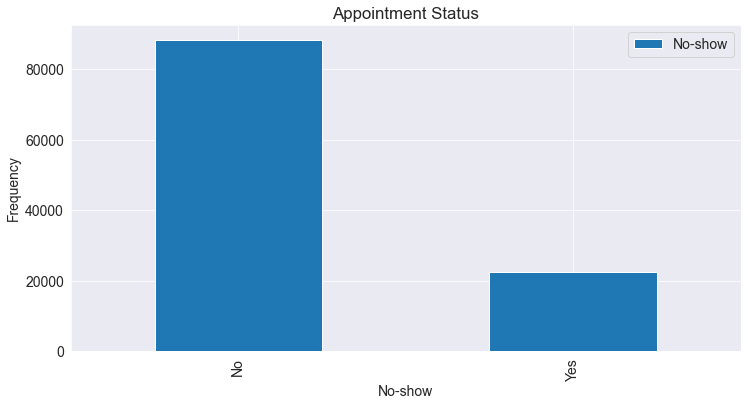

In [31]:
plt.figure(figsize=[12,6])
dt['No-show'].value_counts().plot(kind='bar')
plt.title("Appointment Status")
plt.xlabel("No-show")
plt.ylabel('Frequency')
plt.legend()
plt.show()

> From the graph above, you can see that our statistical analysis proofed to be true based on the percentage calculations we did earlier.

### Research Question 2  (What age range had the lowest number of no show?)

In [32]:
Age_highest = No_show.groupby('Age')[['No-show']].count()
Age_highest.sort_values(by = 'No-show', ascending=True).head()

,No-show
Age,
98,1
96,1
97,2
115,3
95,6


> Age 98 and 96 both has the lowest number of appointment miss

### Research Question 3  (What day of the week had the highest number of No shows on the day of appointment?)

In [33]:
Week_miss = No_show.groupby('Appointment_DOW')[['No-show']].count()
Week_miss.sort_values(by = 'No-show', ascending=False).head()

,No-show
Appointment_DOW,
Tuesday,5152
Wednesday,5093
Monday,4690
Friday,4037
Thursday,3338


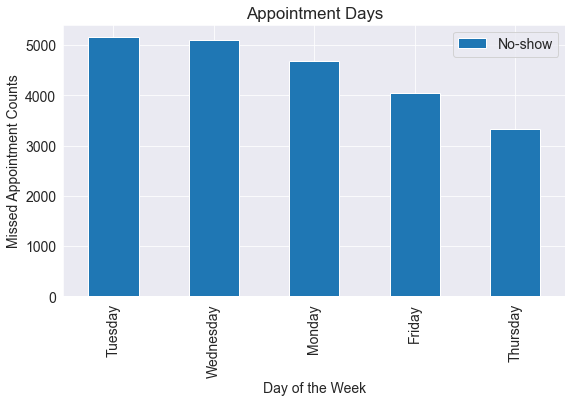

In [34]:
#plt.figure(figsize=(12, 6))
Week_miss.sort_values(by = 'No-show', ascending=False).head().plot(kind='bar');
plt.title('Appointment Days')
plt.xlabel("Day of the Week")
plt.ylabel("Missed Appointment Counts");
plt.show()

> From the above output, you can see that most patients scheduled for tuesday did not show up for the appointment

### Research Question 4  (What Gender has the highest scholarship and still did not show for the appointment?)

In [35]:
Gender_schol = No_show.groupby('Gender')[['Scholarship']].count()
Gender_schol.sort_values(by = 'Scholarship', ascending=False).head()

,Scholarship
Gender,
F,14594
M,7725


> The above output clearly shows that the **Female** gender missed most of their appointments than the men

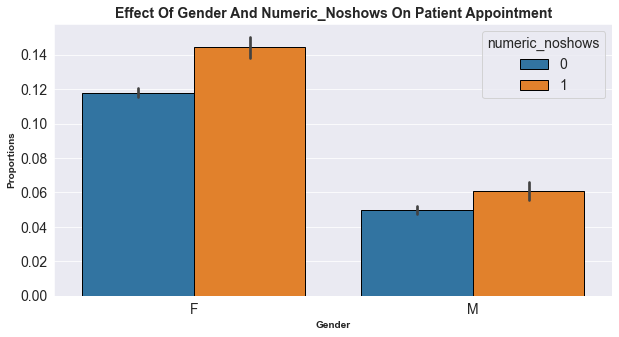

In [36]:
plotgraph(dt,'Gender','Scholarship','numeric_noshows')


### Data Cleaning (Statistical analysis of the correlation for all independent feature to the dependent)

> You can see from the graph that the female gender has more scholarship and also has the highest number of no show considering the legend

### Research Question 5 (Is there anyone older than 100 and if yes, what age, how many patients are aged 115 and what gender are they?)

In [37]:
age_aggregate = dt['Age'].agg([np.mean, np.max, np.min])
age_aggregate.astype(int)

mean     37
amax    115
amin      0
Name: Age, dtype: int32

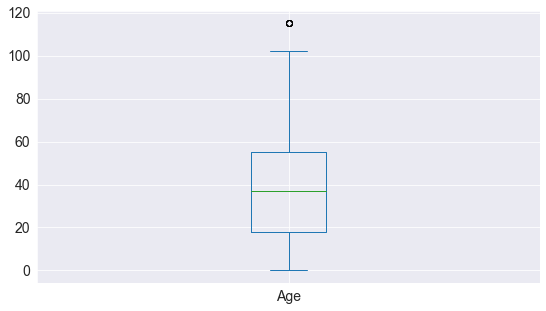

In [38]:
dt["Age"].plot(kind="box");

As seen from the boxplot, the age difference from the mean age is much and thus, 115 is seen as an outlier

In [39]:
get_age = dt[dt['Age'] == 115]
get_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_DOW,Appointment_DOW,Waiting_days,numeric_noshows
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,Monday,Thursday,2,1
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,Monday,Thursday,2,1
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,Friday,Monday,37,1
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,No,Monday,Monday,0,0
97666,7.482346e+14,5717451,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,No,Thursday,Friday,14,0


<a id='conclusions'></a>
## Conclusions

**Result:** Our data suggests that

>1. Older patients tend to show up for appointments than the younger patients.
>
>2. A new column named **Waiting_days** was created to show or know how long a patient waited from the day of scheduling an appointment to the actually day of the appointment.
>
>3. The female category of patients had the the highest number of scholarship but then, that doesn't assure that they will meet up with the appointment.
>
>4. The percentage of patients who showed up for an appointment is greater than those who did not show up.
>
>5. Some patients came multiple times to schedule for different appointments thus the deplicate as seen.
>
>6. Female patients missed the most appointment.
>
>7. Tuesday has the highest occurance of missed appointments
>
>8. There are two patients aged 115, they are both female. One scheduled an appointment three times and missed all three appointments.

<a id='limitations'></a>
## Limitations

>1. There was no appointment schedule on sunday which bags the question if sunday was a day for the workers to rest or if the said day means they are not open for work.
>
>2. Since there was no cause or explanation to what may have made a patient miss an appointment, knowing how critical the issue with the patient becomes a problem as there is no reason for booking the appointment in the first place.
>
>3. After feature engineering was done to find the number of days a patient had to wait, analysis shows that there was a negetive value and that can only mean that the appointment was attended even before it was schedule. An explanation of that came to be is paramount and so, the data is limited to a point.
>
>4. I noticed that there was a negative value in the **Age** column and that made me curious as to what the supposed value is.
>
>5. The **Age** column has a value of zero which got me wondering if it meant a newborn or an error during imputation.
>
>6. Those who missed their appointments give rise to concerns on if they got solution as to why they fixed an appointment previously or if their situation worsend and thus, their inability to meet up the appointment.

<a id='refrences'></a>
## Refrences

>https://classroom.udacity.com/nanodegrees/nd002-alg-t2/parts/cd0000/modules/a8411eaf-1cfb-40f1-a8e7-9678bf06e83d/lessons/ls0526/concepts/f41d3e13-9bbc-45a7-8e7e-14f9e5ba1607
>
>https://towardsdatascience.com/delete-row-from-pandas-dataframes-based-on-column-value-4b18bb1eb602
>
>https://www.geeksforgeeks.org/formatted-string-literals-f-strings-python/
>
>https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas